# Les nouveaux modes d’accès aux données: le format parquet et les

données sur le cloud

<p class="badges">

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/NLP/05a_s3.ipynb" class="github"><i class="fab fa-github"></i></a>
<a href="https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/NLP/05a_s3.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter" alt="Download"></a>
<a href="https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/NLP/05a_s3.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter" alt="nbviewer"></a>
<a href="https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABnotebooks/course/NLP/05a_s3.ipynb%C2%BB&security.allowlist.enabled=false" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&amp;color=yellow?logo=Python" alt="Onyxia"></a><br>
<a href="https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath={binder_path}" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=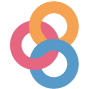" alt="Binder"></a>
<a href="http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/NLP/05a_s3.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<a href="https://github.dev/linogaliana/python-datascientist/notebooks/course/NLP/05a_s3.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc" alt="githubdev"></a>

</p>

</p>

# Elements de contexte

## Principe du stockage de la donnée

Pour comprendre les apports du format `Parquet`, il est nécessaire
de faire un détour pour comprendre la manière dont une information
est stockée et accessible à un langage de traitement de la donnée.

Il existe deux approches dans le monde du stockage de la donnée.
La première est celle de la **base de données relationnelle**. La seconde est le
principe du **fichier**.
La différence entre les deux est dans la manière dont l’accès aux
données est organisé.

## Les fichiers

Dans un fichier, les données sont organisées selon un certain format et
le logiciel de traitement de la donnée va aller chercher et structurer
l’information en fonction de ce format. Par exemple, dans un fichier
`.csv`, les différentes informations seront stockées au même niveau
avec un caractère pour les séparer (la virgule `,` dans les `.csv` anglosaxons, le point virgule dans les `.csv` français, la tabulation dans les `.tsv`). Le fichier suivant

``` raw
nom ; profession 
Astérix ; 
Obélix ; Tailleur de menhir ;
Assurancetourix ; Barde
```

sera ainsi organisé naturellement sous forme tabulée par `Python`

In [2]:
# echo: false
import pandas as pd
from io import StringIO
pd.read_csv(
    StringIO(
        """
        nom ; profession
        Astérix ; 
        Obélix ; Tailleur de menhir
        Assurancetourix ; Barde
        """
    ),
    sep = ";"
)

A propos des fichiers de ce type, on parle de **fichiers plats** car
les enregistrements relatifs à une observation sont stockés ensemble,
sans hiérarchie.  
Certains formats de données vont permettre de hiérarchiser les informations
de manière différente. Par exemple, le format `JSON` permettra de hiérarchiser différemment la même information que précédemment `{=html} <a name="cite_note-1"></a>1. [^](#cite_ref-1)`

``` raw
[
  {
    "nom": "Astérix"
  },
  {
    "nom": "Obélix",
    "profession": "Tailleur de menhir"
  },
  {
    "nom": "Assurancetourix",
    "profession": "Barde"
  }
]
```

La différence entre le CSV et le format `JSON` va au-delà d’un simple “formattage” des données. Par sa nature non tabulaire, le format JSON permet des mises à jour beaucoup plus facile de la donnée dans les entrepôts de données. Par exemple, un site web qui collecte de nouvelles données n’aura pas à mettre à jour l’ensemble de ses enregistrements antérieurs pour stocker la nouvelle donnée (par exemple pour indiquer que pour tel ou tel client cette donnée n’a pas été collectée) mais pourra la stocker dans
un nouvel item. Ce sera à l’outil de requête (`Python` ou un autre outil)
de créer une relation entre les enregistrements stockés à des endroits
différents. Ce type d’approche flexible est l’un des fondements de l’approche NoSQL, sur laquelle nous allons revenir, qui a permis l’émergence de technologies au coeur de l’écosystème actuel du *big-data* comme `Hadoop` ou `ElasticSearch`.

Cette fois, quand on n’a pas d’information, on ne se retrouve pas avec nos deux séparateurs accolés (cf. la ligne *“Astérix”*) mais l’information
n’est tout simplement pas collectée.
Il se peut très bien que l’information sur une observation soit disséminée
dans plusieurs fichiers dont les formats diffèrent. Par exemple, dans le domaine des données géographiques, lorsqu’une donnée est disponible sous format de fichier(s), elle peut l’être de deux manières. Soit la donnée est stockée dans un seul fichier qui mélange contours géographiques et valeurs attributaires (la valeur associée à cette observation géographique, par exemple le taux d’abstention). Ce principe est celui du `geojson`. Soit la donnée est stockée dans plusieurs fichiers qui sont spécialisés: un fichier va stocker les contours géographiques, l’autre les données attributaires et d’autres fichiers des informations annexes (comme le système de projection). Ce principe est celui du `shapefile`. C’est alors le logiciel qui requête
les données (`Python` par exemple) qui saura où aller chercher l’information dans les différents fichiers et associer celle-ci de manière cohérente.

Un concept supplémentaire dans le monde du fichier est celui du **file system**. Le  
*file system* est le système de localisation et de nommage des fichiers.
Pour simplifier, le file système est la manière dont votre ordinateur saura
retrouver, dans son système de stockage, les bits présents dans tel ou tel fichier
appartenant à tel ou tel dossier.

## Les bases de données

La logique des bases de données est différente. Elle est plus systémique.
Un système de gestion de base de données (*Database Management System*)
est un logiciel qui gère à la fois le stockage d’un ensemble de données reliée,
permet de mettre à jour celle-ci (ajout ou suppression d’informations)
et qui gère également
les modalités d’accès à la donnée (type de requête, utilisateurs
ayant les droits en lecture ou en écriture…).

La relation entre les entités présentes dans une base de données
prend généralement la forme d’un **schéma en étoile**. Une base va centraliser
les informations disponibles qui seront ensuite détaillées dans des tables
dédiées.

![](https://www.databricks.com/wp-content/uploads/2022/04/star-schema-erd.png)
Source: [La documentation `Databricks` sur le schéma en étoile](https://www.databricks.com/fr/glossary/star-schema)

Le logiciel associé à la base de données fera ensuite le lien
entre ces tables à partir de requêtes `SQL`. L’un des logiciels les plus efficaces dans ce domaine
est [`PostgreSQL`](https://www.postgresql.org/). `Python` est tout à fait
utilisable pour passer une requête SQL à un gestionnaire de base de données.
Les packages [`sqlalchemy`](https://www.sqlalchemy.org/) et [`psycopg2`](https://www.psycopg.org/docs/) peuvent servir à utiliser `PostgreSQL` pour requêter une
base de donnée ou la mettre à jour.

La logique de la base de données est donc très différente de celle du fichier.
Ces derniers sont beaucoup plus légers pour plusieurs raisons.
D’abord, parce qu’ils sont moins adhérents à
un logiciel gestionnaire. Là où le fichier ne nécessite, pour la gestion,
qu’un *file system*, installé par défaut sur
tout système d’exploitation, une base de données va nécessite un
logiciel spécialisé. L’inconvénient de l’approche fichier, sous sa forme
standard, est qu’elle
ne permet pas une gestion fine des droits d’accès et amène généralement à une
duplication de la donnée pour éviter que la source initiale soit ré-écrite (involontairement ou de manière intentionnelle par un utilisateur malveillant). Il s’agit de l’une des
innovations des systèmes *cloud*, sur lesquelles nous reviendrons en évoquant le
système `S3`. Un deuxième inconvénient de l’approche base de données par
rapport à l’approche fichier, pour un utilisateur de `Python`,
est que les premiers nécessitent l’intermédiation du logiciel de gestion
de base de données là où, dans le second cas, on va se contenter d’une
librairie, donc un système beaucoup plus léger,
qui sait comment transformer la donnée brute en `DataFrame`.
Pour ces raisons, entre autres, les bases de données sont donc moins à la
mode dans l’écosystème récent de la *data-science* que les fichiers.

## Le format `parquet`

![](https://www.upsolver.com/wp-content/uploads/2020/05/Screen-Shot-2020-05-26-at-17.52.58.png)

Des éléments supplémentaires sur `Parquet` sont disponibles sur ce très bon
post de blog d’[upsolver](https://www.upsolver.com/blog/apache-parquet-why-use)
et [sur la page officielle du projet `Parquet`](https://parquet.apache.org/).

## Qu’est-ce que le système de stockage S3 ?

Dans les entreprises et administrations, un nombre croissant de données sont
disponibles depuis un système de stockage
nommé `S3`.
Le système S3 (*Simple Storage System*) est un système de stockage développé
par Amazon et qui est maintenant devenu une référence pour le stockage en ligne.
Il s’agit d’une architecture à la fois
sécurisée (données cryptées, accès restreints) et performante.

Le concept central du système S3 est le *bucket*.
Un *bucket* est un espace (privé ou partagé) où on peut stocker une
arborescence de fichiers. Pour accéder aux fichiers figurant
dans un *bucket* privé, il fournit des jetons d’accès (l’équivalent d’un mot de passe)
reconnus par le serveur de stockage. On peut alors lire et écrire dans le *bucket*.

Le SSP cloud
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python.png)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=%C2%ABpython-datascientist%C2%BB&resources.requests.memory=%C2%AB4Gi%C2%BB) repose par exemple sur cette infrastructure technique.

## Comment faire avec Python ?

### Les librairies principales

L’interaction entre ce système distant de fichiers et une session locale de Python
est possible grâce à des API. Les deux principales librairies sont les suivantes:

-   [boto3](https://boto3.amazonaws.com/v1/documentation/api/latest/index.html), une librairie créée et maintenue par Amazon ;
-   [s3fs](https://s3fs.readthedocs.io/en/latest/), une librairie qui permet d’interagir avec les fichiers stockés à l’instar d’un filesystem classique.

Ces deux librairies offrent toutes deux la possibilité de se connecter depuis `Python`,
à un dépôt de fichiers distant, de lister les fichiers disponibles dans un
*bucket*, d’en télécharger un ou plusieurs ou de faire de l’*upload*

<div class="alert alert-info" role="alert">

Les exemples suivants seront réplicables pour les utilisateurs de la plateforme
SSP-cloud

</div>

Personnellement, j’ai une petite préférence pour `boto3` que je trouve plus
intuitif.

### Quelques cas spéciaux

La librairie ultra-performante [`arrow`](https://arrow.apache.org/docs/python/)
propose également un accès à des fichiers sur
`S3` comme s’ils étaient disponibles sur un *filesystem*
local. Un exemple, assez court, est disponible
[dans la documentation officielle](https://arrow.apache.org/docs/python/filesystems.html#s3)

Les utilisateurs de
[`Snakemake`](https://snakemake.readthedocs.io/en/stable/snakefiles/remote_files.html)
peuvent également
lire ou écrire des tables intermédiaires sur `S3`
comme s’ils utilisaient un
système de fichier local. En arrière-plan, `snakemake`
va utiliser `boto3` pour communiquer avec le système
de stockage

Un outil très performant utilisant la ligne de commande est également
disponible. Son nom est `mc` pour
[`Minio Client`](https://docs.min.io/docs/minio-client-complete-guide.html).
Il propose les mêmes
opérations que la ligne de commande linux mais avec un système distant.

## Connexion à un bucket

Par la suite, on va utiliser des alias pour les trois valeurs suivantes, qui servent
à s’authentifier.

``` python
key_id = 'MY_KEY_ID'
access_key = 'MY_ACCESS_KEY'
token = "MY_TOKEN"
```

Ces valeurs peuvent être également disponibles dans
les variables d’environnement de `Python`. Comme il s’agit d’une information
d’authentification personnelle, il ne faut pas stocker les vraies valeurs de ces
variables dans un projet, sous peine de partager des traits d’identité sans le
vouloir lors d’un partage de code.

{{< tabs tabTotal=“4” >}}

{{% tab tabName=“boto3” %}}

Avec `boto3`, on créé d’abord un client puis on exécute des requêtes dessus.
Pour initialiser un client, il suffit, en supposant que l’url du dépôt S3 est
`"https://minio.lab.sspcloud.fr"`, de faire:

``` python
import boto3
s3 = boto3.client("s3",endpoint_url = "https://minio.lab.sspcloud.fr")
```

{{% /tab %}}
{{% tab tabName=“S3FS” %}}

La logique est identique avec `s3fs`.

Si on a des jetons d’accès à jour et dans les variables d’environnement
adéquates:

``` python
import s3fs
fs = s3fs.S3FileSystem(
  client_kwargs={'endpoint_url': 'https://minio.lab.sspcloud.fr'})
```

{{% /tab %}}
{{% tab tabName=“Arrow” %}}

La logique d’`Arrow` est proche de celle de `s3fs`. Seuls les noms
d’arguments changent

Si on a des jetons d’accès à jour et dans les variables d’environnement
adéquates:

``` python
from pyarrow import fs
s3 = fs.S3FileSystem(endpoint_override="http://"+"minio.lab.sspcloud.fr")
```

{{% /tab %}}

{{% tab tabName=“Snakemake” %}}

La logique de `Snakemake` est, quant à elle,
plus proche de celle de `boto3`. Seuls les noms
d’arguments changent

Si on a des jetons d’accès à jour et dans les variables d’environnement
adéquates:

``` python
from snakemake.remote.S3 import RemoteProvider as S3RemoteProvider
S3 = S3RemoteProvider(host = "https://" + os.getenv('AWS_S3_ENDPOINT'))
```

{{% /tab %}}

{{< /tabs >}}

Il se peut que la connexion à ce stade soit refusée (`HTTP error 403`).
Cela peut provenir
d’une erreur dans l’URL utilisé. Cependant, cela reflète plus généralement
des paramètres d’authentification erronés.

{{< tabs tabTotal=“4” >}}

{{% tab tabName=“boto3” %}}

Les paramètres d’authentification sont des arguments supplémentaires:

``` python
import boto3
s3 = boto3.client("s3",endpoint_url = "https://minio.lab.sspcloud.fr",
                  aws_access_key_id=key_id, 
                  aws_secret_access_key=access_key, 
                  aws_session_token = token)
```

{{% /tab %}}

{{% tab tabName=“S3FS” %}}

La logique est la même, seuls les noms d’arguments diffèrent

``` python
import s3fs
fs = s3fs.S3FileSystem(
  client_kwargs={'endpoint_url': 'https://'+'minio.lab.sspcloud.fr'},
  key = key_id, secret = access_key,
  token = token)
```

{{% /tab %}}

{{% tab tabName=“Arrow” %}}

Tout est en argument cette fois:

``` python
from pyarrow import fs

s3 = fs.S3FileSystem(
    access_key = key_id,
    secret_key = access_key,
    session_token = token,
    endpoint_override = 'https://'+'minio.lab.sspcloud.fr',
    scheme = "https"
    )
```

{{% /tab %}}

{{% tab tabName=“Snakemake” %}}

La logique est la même, seuls les noms d’arguments diffèrent

``` python
from snakemake.remote.S3 import RemoteProvider as S3RemoteProvider
S3 = S3RemoteProvider(host = "https://" + os.getenv('AWS_S3_ENDPOINT'), access_key_id=key_id, secret_access_key=access_key)
```

{{% /tab %}}

{{< /tabs >}}

<div class="alert alert-info" role="alert">

Dans le SSP-cloud,
lorsque l’initialisation du service `Jupyter` du SSP-cloud est récente
(moins de 12 heures), il est possible d’utiliser
automatiquement les jetons stockés automatiquement à la création du dépôt.

Si on désire accéder aux données du SSP-cloud depuis une session python du
datalab (service VSCode, Jupyter…),
il faut remplacer l’url par `http://minio.lab.sspcloud.fr`

</div>

## Lister les fichiers

S’il n’y a pas d’erreur à ce stade, c’est que la connexion est bien effective.
Pour le vérifier, on peut essayer de faire la liste des fichiers disponibles
dans un `bucket` auquel on désire accéder.

Par exemple, on peut vouloir
tester l’accès aux bases `FILOSOFI` (données de revenu localisées disponibles
sur <https://www.insee.fr>) au sein du bucket `donnees-insee`.

{{< tabs tabTotal=“5” >}}

{{% tab tabName=“boto3” %}}

Pour cela,
la méthode `list_objects` offre toutes les options nécessaires:

``` python
for key in s3.list_objects(Bucket='donnees-insee', Prefix='FILOSOFI')['Contents']:
    print(key['Key'])
```

{{% /tab %}}

{{% tab tabName=“S3FS” %}}

Pour lister les fichiers, c’est la méthode `ls` (celle-ci ne liste pas par
défaut les fichiers de manière récursive comme `boto3`):

In [3]:
fs.ls("donnees-insee")

{{% /tab %}}

{{% tab tabName=“Arrow” %}}

``` python
from pyarrow import fs
s3 = fs.S3FileSystem(endpoint_override='http://'+'minio.lab.sspcloud.fr')
s3.get_file_info(fs.FileSelector('donnees-insee', recursive=True))
```

{{% /tab %}}

{{% tab tabName=“mc” %}}

``` shell
mc ls -r
```

{{% /tab %}}

{{< /tabs >}}

## Télécharger un fichier depuis s3 pour l’enregistrer en local

Cette méthode n’est en général pas recommandée car, comme on va le voir
par la suite, il est possible de lire à la volée des fichiers. Cependant,
télécharger un fichier depuis le *cloud* pour l’écrire sur le disque
local peut parfois être utile (par exemple, lorsqu’il est nécessaire
de dézipper un fichier).

{{< tabs tabTotal=“4” >}}

{{% tab tabName=“boto3” %}}

On utilise cette fois la méthode `download_file`

``` python
s3.download_file('donnees-insee', "FILOSOFI/2014/FILOSOFI_COM.csv", 'data.csv')
```

{{% /tab %}}

{{% tab tabName=“S3FS” %}}

``` python
fs.download('donnees-insee/FILOSOFI/2014/FILOSOFI_COM.csv','test.csv')
```

{{% /tab %}}

{{% tab tabName=“Snakemake” %}}

``` python
from snakemake.remote.S3 import RemoteProvider as S3RemoteProvider
S3 = S3RemoteProvider(host = "https://" + os.getenv('AWS_S3_ENDPOINT'))
bucket = "mon-bucket"

rule ma_super_regle_s3:
    input:
        fichier = S3.remote(f'{bucket}/moninput.csv')
    output:
        fichier='mon_dossier_local/monoutput.csv'
    run:
        shell("cp {input[0]} {output[0]}")
```

{{% /tab %}}

{{% tab tabName=“mc” %}}

In [4]:
mc cp "donnees-insee/FILOSOFI/2014/FILOSOFI_COM.csv" 'data.csv'

{{% /tab %}}

{{< /tabs >}}

## Lire un fichier directement

La méthode précédente n’est pas optimale. En effet, l’un des intérêts des API
est qu’on peut traiter un fichier sur `S3` comme s’il s’agissait d’un fichier
sur son PC. Cela est d’ailleurs une manière plus sécurisée de procéder puisqu’on
lit les données à la volée, sans les écrire dans un filesystem local.

{{< tabs tabTotal=“4” >}}

{{% tab tabName=“boto3” %}}

``` python
obj = s3.get_object(Bucket='donnees-insee', Key="FILOSOFI/2014/FILOSOFI_COM.csv")
df = pd.read_csv(obj['Body'], sep = ";")
df.head(2)
```

{{% /tab %}}

{{% tab tabName=“S3FS” %}}

Le code suivant devrait permettre d’effectuer la même opération avec `s3fs`

``` python
df = pd.read_csv(fs.open('{}/{}'.format('donnees-insee', "FILOSOFI/2014/FILOSOFI_COM.csv"),
                         mode='rb')
                 )

df.head(2)
```

{{% /tab %}}

{{% tab tabName=“Snakemake” %}}

``` python
from snakemake.remote.S3 import RemoteProvider as S3RemoteProvider
S3 = S3RemoteProvider(host = "https://" + os.getenv('AWS_S3_ENDPOINT'))
bucket = "mon-bucket"

rule ma_super_regle_s3:
    input:
        fichier = S3.remote(f'{bucket}/moninput.csv')
    run:
        import pandas as pd
        df = pd.read_csv(input.fichier)
        # PLUS D'OPERATIONS
```

{{% /tab %}}

{{% tab tabName=“Arrow” %}}

`Arrow` est une librairie qui permet de lire des `CSV`.
Il est néanmoins
beaucoup plus pratique d’utiliser le format `parquet` avec `arrow`.
Dans un premier temps, on configure le *filesystem* avec les
fonctionalités d’`Arrow` (cf. précédemment).

In [5]:
from pyarrow import fs

s3 = fs.S3FileSystem(endpoint_override='http://'+'minio.lab.sspcloud.fr')

Pour lire un csv, on fera:

``` python
from pyarrow import csv

with s3.open_input_file("donnees-insee/FILOSOFI/2014/FILOSOFI_COM.csv") as file:
    df = csv.read_csv(file, parse_options=csv.ParseOptions(delimiter=";")).to_pandas()

df.head(2)
```

Pour un fichier au format parquet, on privilégiera:

``` python
import pyarrow.parquet as pq
#bucket = ""
#parquet_file=""
df = pq.ParquetDataset(f'{bucket}/{parquet_file}', filesystem=s3).read_pandas().to_pandas()
```

{{% /tab %}}

{{< /tabs >}}

## Uploader un fichier

{{< tabs tabTotal=“5” >}}

{{% tab tabName=“boto3” %}}

``` python
s3.upload_file(file_name, bucket, object_name)
```

{{% /tab %}}

{{% tab tabName=“S3FS” %}}

``` python
fs.upload(bucket + "/" + file_name)
```

{{% /tab %}}

{{% tab tabName=“Arrow” %}}

Supposons que `df` soit un `pd.DataFrame`
Dans un système local, on convertirait
en table `Arrow` puis on écrirait en `parquet`
([voir la documentation officielle](https://arrow.apache.org/docs/python/parquet.html#reading-and-writing-single-files)).
Quand on est sur un système `S3`, il s’agit seulement d’ajouter
notre connexion à `S3` dans l’argument `filesystem`
([voir la page sur ce sujet dans la documentation Arrow](https://arrow.apache.org/docs/python/filesystems.html#filesystem-s3))

``` python
import pyarrow as pa
import pyarrow.parquet as pq

table = pa.Table.from_pandas(df)
pq.write_table(table, f"{bucket}/{path}", filesystem=s3)
```

{{% /tab %}}

{{% tab tabName=“Snakemake” %}}

``` python
from snakemake.remote.S3 import RemoteProvider as S3RemoteProvider
S3 = S3RemoteProvider(host = "https://" + os.getenv('AWS_S3_ENDPOINT'))
bucket = "mon-bucket"

rule ma_super_regle_s3:
    input:
        fichier='mon_dossier_local/moninput.csv'
    output:
        fichier=S3.remote(f'{bucket}/monoutput.csv')
    run:
        shell("cp output.fichier input.fichier")
```

{{% /tab %}}

{{% tab tabName=“mc” %}}

``` python
mc cp 'data.csv' "MONBUCKET/monoutput.csv"
```

{{% /tab %}}

{{< /tabs >}}

## Pour aller plus loin

-   [La documentation sur MinIO du SSPCloud](https://docs.sspcloud.fr/onyxia-guide/stockage-de-donnees)